<a href="https://colab.research.google.com/github/KV-23/FINANCE_PROJECTS/blob/main/MFI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [2]:
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [3]:
end_date=datetime.today().strftime('%Y-%m-%d')
df=yf.download('AAPL',start='2020-01-01',end=end_date)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876122,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167610,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742653,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400543,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565193,132079200
...,...,...,...,...,...,...
2024-08-12,216.070007,219.509995,215.600006,217.529999,217.529999,38028100
2024-08-13,219.009995,221.889999,219.009995,221.270004,221.270004,44155300
2024-08-14,220.570007,223.029999,219.699997,221.720001,221.720001,41960600


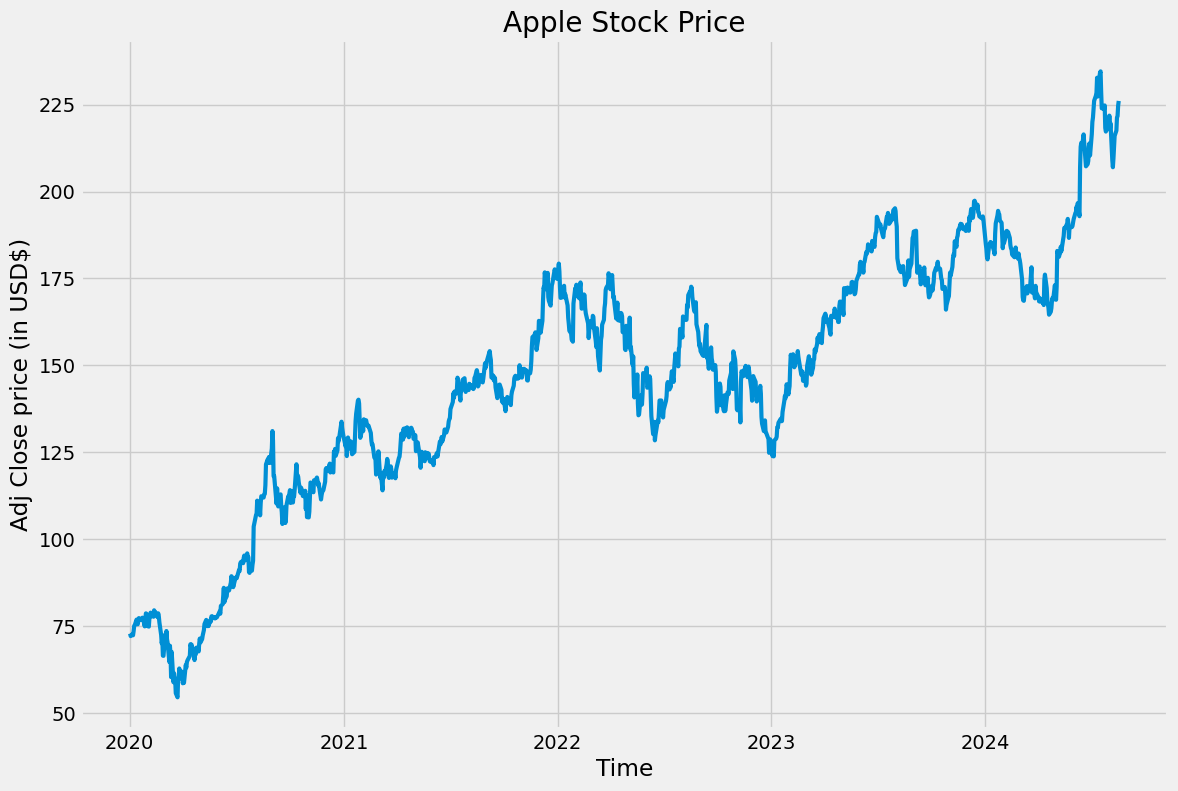

In [4]:
plt.figure(figsize=(12.5,8.5))
plt.title("Apple Stock Price")
plt.plot(df['Adj Close'],label='Apple Stock',linewidth=3)
plt.xlabel('Time')
plt.ylabel('Adj Close price (in USD$)')
plt.show()

In [5]:
typical_price=(df['Adj Close']+df['High']+df['Low'])/3
typical_price

period=14
#calculating the raw money flow
raw_money_flow=typical_price*df['Volume']

In [6]:
positive_money_flow = []
negative_money_flow = []
for i in range(1, len(typical_price)):
  if typical_price[i] > typical_price[i - 1]:
    positive_money_flow.append(raw_money_flow[i-1])
    negative_money_flow.append(0)
  elif typical_price[i] < typical_price[i - 1]:
    positive_money_flow.append(0)
    negative_money_flow.append(raw_money_flow[i-1])
  else:
    positive_money_flow.append(0)
    negative_money_flow.append(0)

positive_mf=[]
negative_mf=[]

for i in range(period-1,len(positive_money_flow)):
  positive_mf.append(sum(positive_money_flow[i+1-period:i+1]))
for i in range(period-1,len(negative_money_flow)):
  negative_mf.append(sum(negative_money_flow[i+1-period:i+1]))

In [7]:
mfi=100*np.array(positive_mf)/(np.array(negative_mf)+np.array(positive_mf))
mfi

array([55.5084579 , 62.23958689, 61.87921518, ..., 61.02259945,
       60.59719384, 66.09956597])

In [8]:
df2=pd.DataFrame()
df2['MFI']=mfi
df2

,MFI
0,55.508458
1,62.239587
2,61.879215
3,62.862995
4,64.041952
...,...
1145,49.427436
1146,54.253640
1147,61.022599
1148,60.597194


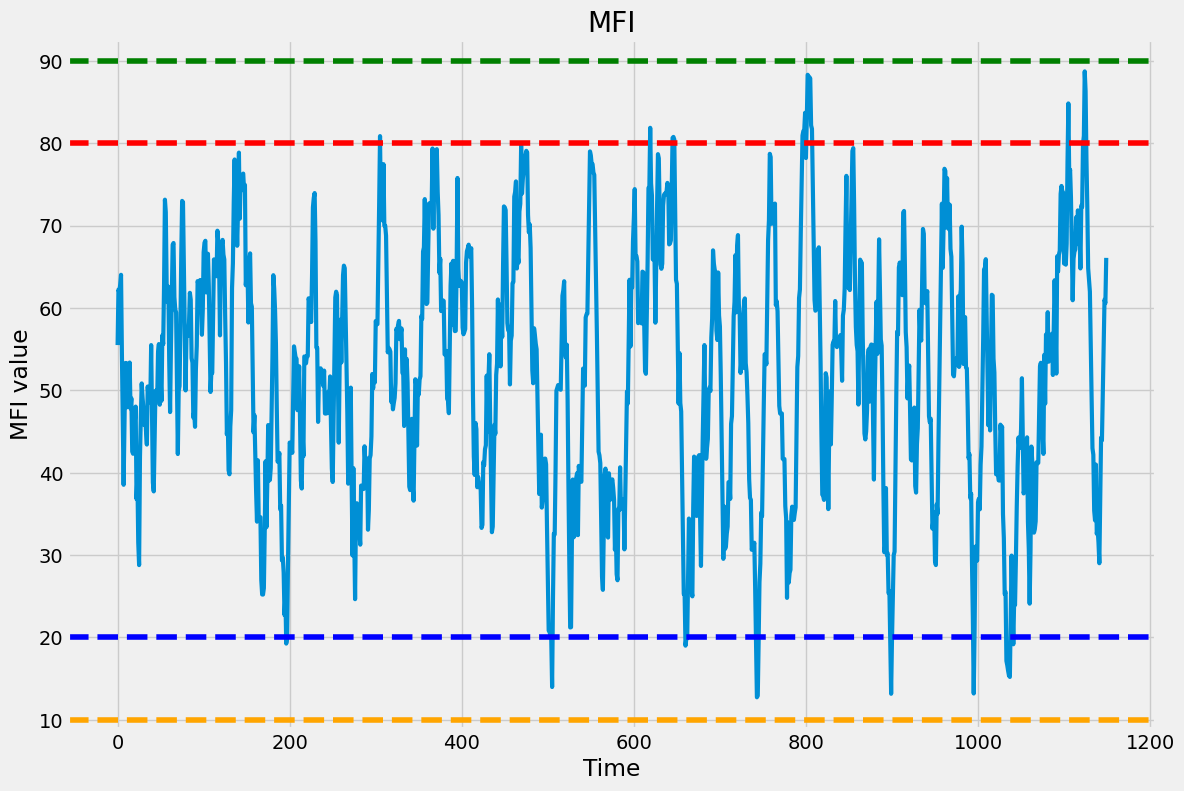

In [9]:
plt.figure(figsize=(12.5,8.5))
plt.title("MFI")
plt.plot(df2['MFI'],label='MFI',linewidth=3)
plt.axhline(10,linestyle='--',color='Orange')
plt.axhline(20,linestyle='--',color='blue')
plt.axhline(80,linestyle='--',color='red')
plt.axhline(90,linestyle='--',color='green')
plt.xlabel('Time')
plt.ylabel('MFI value')
plt.show()

In [11]:
new_df=pd.DataFrame()
new_df=df[period:]
new_df['MFI']=mfi

In [12]:
new_df

,Open,High,Low,Close,Adj Close,Volume,MFI
Date,,,,,,,
2020-01-23,79.480003,79.889999,78.912498,79.807503,77.457108,104472000,55.508458
2020-01-24,80.062500,80.832497,79.379997,79.577499,77.233871,146537600,62.239587
2020-01-27,77.514999,77.942497,76.220001,77.237503,74.962799,161940000,61.879215
2020-01-28,78.150002,79.599998,78.047501,79.422501,77.083443,162234000,62.862995
2020-01-29,81.112503,81.962502,80.345001,81.084999,78.696976,216229200,64.041952
...,...,...,...,...,...,...,...
2024-08-12,216.070007,219.509995,215.600006,217.529999,217.529999,38028100,49.427436
2024-08-13,219.009995,221.889999,219.009995,221.270004,221.270004,44155300,54.253640
2024-08-14,220.570007,223.029999,219.699997,221.720001,221.720001,41960600,61.022599


In [18]:
def get_signal(data,high,low):
  buy_signal=[]
  sell_signal=[]

  for i in range(len(data['MFI'])):
    if data['MFI'][i]>high:
      sell_signal.append(data['Adj Close'][i])
      buy_signal.append(np.nan)
    elif data['MFI'][i]<low:
      buy_signal.append(data['Adj Close'][i])
      sell_signal.append(np.nan)
    else:
      buy_signal.append(np.nan)
      sell_signal.append(np.nan)
  return (buy_signal,sell_signal)

In [19]:
high=80
low=20
signals=get_signal(new_df,high,low)
new_df['Buy']=signals[0]
new_df['Sell']=signals[1]

new_df

,Open,High,Low,Close,Adj Close,Volume,MFI,Buy,Sell
Date,,,,,,,,,
2020-01-23,79.480003,79.889999,78.912498,79.807503,77.457108,104472000,55.508458,NaN,NaN
2020-01-24,80.062500,80.832497,79.379997,79.577499,77.233871,146537600,62.239587,NaN,NaN
2020-01-27,77.514999,77.942497,76.220001,77.237503,74.962799,161940000,61.879215,NaN,NaN
2020-01-28,78.150002,79.599998,78.047501,79.422501,77.083443,162234000,62.862995,NaN,NaN
2020-01-29,81.112503,81.962502,80.345001,81.084999,78.696976,216229200,64.041952,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-08-12,216.070007,219.509995,215.600006,217.529999,217.529999,38028100,49.427436,NaN,NaN
2024-08-13,219.009995,221.889999,219.009995,221.270004,221.270004,44155300,54.253640,NaN,NaN
2024-08-14,220.570007,223.029999,219.699997,221.720001,221.720001,41960600,61.022599,NaN,NaN


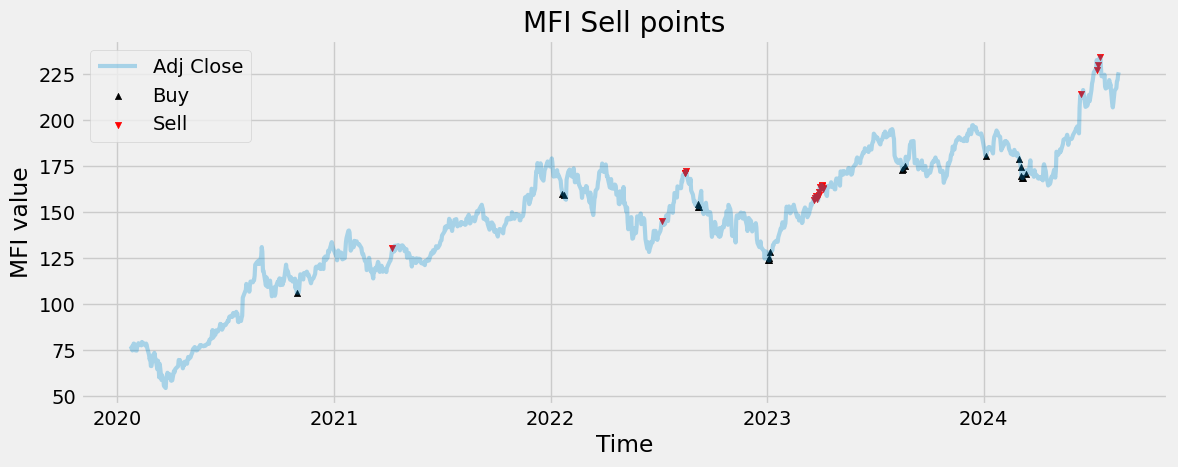

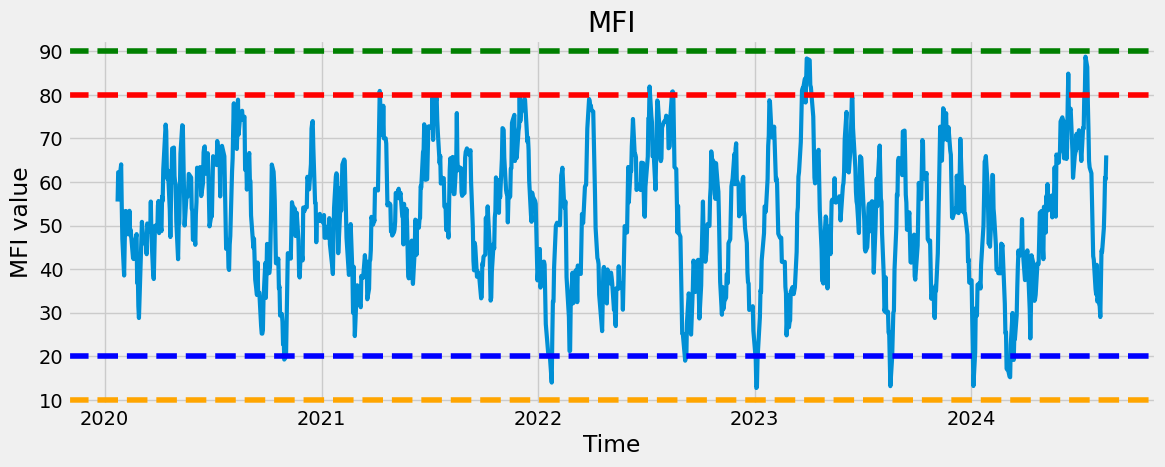

In [30]:
plt.figure(figsize=(12.5,4.5))
plt.title("MFI Sell points")
plt.plot(new_df['Adj Close'],alpha=0.3,linewidth=3,label='Adj Close')
plt.scatter(new_df.index,new_df['Buy'],marker='^',s=20,color='black',label='Buy')
plt.scatter(new_df.index,new_df['Sell'],marker='v',s=20,color='Red',label='Sell')
plt.legend()
plt.xlabel('Time')
plt.ylabel('MFI value')
plt.show()

#Plotting MFI simultaneously
plt.figure(figsize=(12.5,4.5))
plt.title("MFI")
plt.plot(new_df['MFI'],label='MFI',linewidth=3)
plt.axhline(10,linestyle='--',color='Orange')
plt.axhline(20,linestyle='--',color='blue')
plt.axhline(80,linestyle='--',color='red')
plt.axhline(90,linestyle='--',color='green')
plt.xlabel('Time')
plt.ylabel('MFI value')
plt.show()